# Fault Diagnosis Toolbox in Python -- a development notebook

Erik Frisk<br>
<frisk@isy.liu.se><br>
Department of Electrical Engineering<br>
Linköping University<br>
Sweden

## Basic Python imports

In [ ]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import sympy as sym
import scipy.sparse as sp
new_paths = ['Models/', 'Misc/', 'faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/']
[sys.path.append(d) for d in new_paths if not d in sys.path];
from misc import *
import faultdiagnosistoolbox as fdt

## Define a diagnosis models -- structural Three Tank model

In [2]:
#from ThreeTank_model import model
from ThreeTank_model_sym import model

In [3]:
print "Model: %s" % model.name
print "  (ne, nx, nf, nz) = (%d,%d,%d,%d)" % (model.ne(), model.nx(), model.nf(), model.nz())
print "  sprank(X) = %d" % model.sprank()
if model.IsDynamic():
    print "  Dynamic model"
else:
        print "  Static model"

Model: Three Tank System
  (ne, nx, nf, nz) = (12,10,6,3)
  sprank(X) = 10
  Dynamic model


Plot model structure

<IPython.core.display.Javascript object>


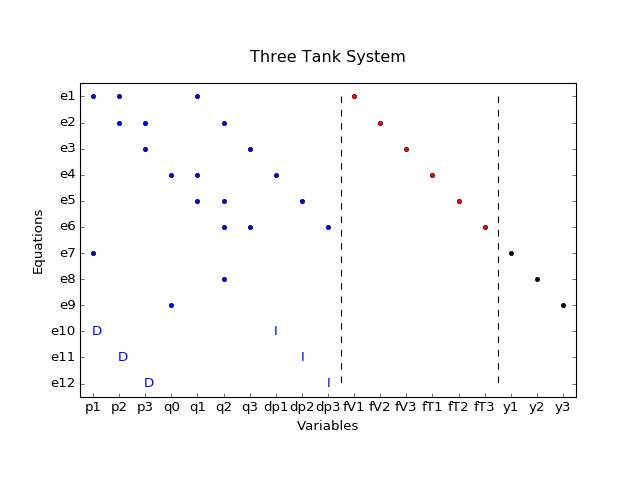

In [4]:
plt.figure(10)
model.PlotModel(verbose=True)
plt.show()

Plot the Dulmage-Mendelsohn decomposition with equivalence class decomposition

In [ ]:
plt.figure(11)
model.PlotDM(eqclass=True,fault=True)
plt.show()

## Apply some class methods

Are the faults detectable?

In [ ]:
model.DetectabilityAnalysis()

Some redundancy properties of the model

In [10]:
print "Redundancy = %d" % model.Redundancy()
print "MTES Redundancy = %d" % model.MTESRedundancy()

Redundancy = 2
MTES Redundancy = 1


What about isolability?

In [ ]:
plt.figure(12)
plt.subplot(1,3,1)
model.IsolabilityAnalysis(permute=True,plot=True)
plt.title('Mixed')

plt.subplot(1,3,2)
im = model.IsolabilityAnalysis(permute=True,plot=True, causality='int')
plt.title('Integral')

plt.subplot(1,3,3)
im = model.IsolabilityAnalysis(permute=True,plot=True, causality='der')
plt.title('Integral')
plt.show()

Find the set of MSO sets

In [ ]:
print "Searching for MSO sets..."
msos=model.MSO()
print "Found %d mso sets" % len(msos)
print msos

Determine which MSO sets that are low index

In [ ]:
li_msos = map(lambda m: model.IsLowIndex(eq=m), msos)
print li_msos

Determine the fault signature and isolability matrix for MSO sets

In [ ]:
plt.figure(13)
plt.subplot(1,2,1)
model.FSM(msos,plot=True)
plt.title('FSM')

plt.subplot(1,2,2)
model.IsolabilityAnalysisArrs(msos, plot=True, permute=True)
plt.title('Isolability matrix')
plt.show()

Find an integral causality matching, if one exists

In [ ]:
mso = msos[2]
rIdx = model.MSOCausalitySweep(mso,causality='int') # Boolean index array to integral causality redundant equation
if np.any(rIdx):
    red = mso[rIdx][0] # Take the first one
    m0 = [e for e in mso if e!=red]
    Gamma = model.Matching(m0)
    print "Found integral causality matching"
else:
    print "No integral causality matching exists"

In [ ]:
plt.figure(14)
model.PlotMatching(Gamma)
plt.show()